In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly as py
from plotly.offline import iplot
import cufflinks as cff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("fraud_oracle.csv")
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


# Exploratory Data Analysis

In [4]:
df.shape

(15420, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
df1=df.copy()

In [8]:
label_encoder=LabelEncoder()
df1["Month"]=label_encoder.fit_transform(df["Month"])
df1["DayOfWeek"]=label_encoder.fit_transform(df["DayOfWeek"])
df1["DayOfWeekClaimed"]=label_encoder.fit_transform(df["DayOfWeekClaimed"])
df1["MonthClaimed"]=label_encoder.fit_transform(df["MonthClaimed"])
#df1["Sex"]=label_encoder.fit_transform(df1["Sex"])

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [10]:
plt.style.use('bmh')

In [11]:
df2=df1.copy()

In [12]:
label_encoder=LabelEncoder()
df2["AccidentArea"]=label_encoder.fit_transform(df2["AccidentArea"])
df2["Sex"]=label_encoder.fit_transform(df2["Sex"])
df2["MaritalStatus"]=label_encoder.fit_transform(df2["MaritalStatus"])





array([<AxesSubplot:title={'center':'MaritalStatus'}>], dtype=object)

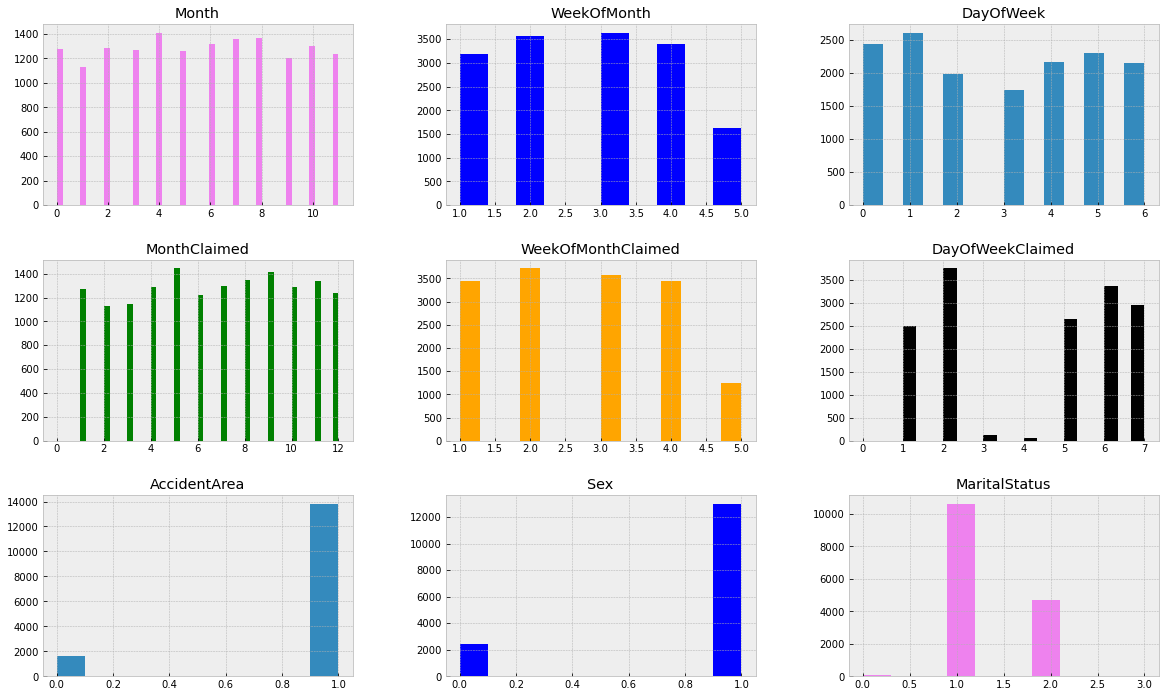

In [13]:
plt.rcParams["figure.figsize"]=(20,12)
fig,ax=plt.subplots(3,3)

df1.hist("Month",ax=ax[0,0],bins=48,color="violet")
df1.hist(["WeekOfMonth"],ax=ax[0,1],color="blue")
df1.hist(['DayOfWeek'],ax=ax[0,2],bins=14)
#sns.countplot(df1["Make"],ax=ax[1,3])
df1.hist(["MonthClaimed"],ax=ax[1,0],bins=48,color="green")
df1.hist(["WeekOfMonthClaimed"],ax=ax[1,1],bins=14,color="orange")
df1.hist(['DayOfWeekClaimed'],ax=ax[1,2],bins=21,color="black")
df2.hist(["AccidentArea"],ax=ax[2,0])
df2.hist(["Sex"],ax=ax[2,1],color="blue")
df2.hist(["MaritalStatus"],ax=ax[2,2],color="violet")

array([<AxesSubplot:title={'center':'DayOfWeek'}>], dtype=object)

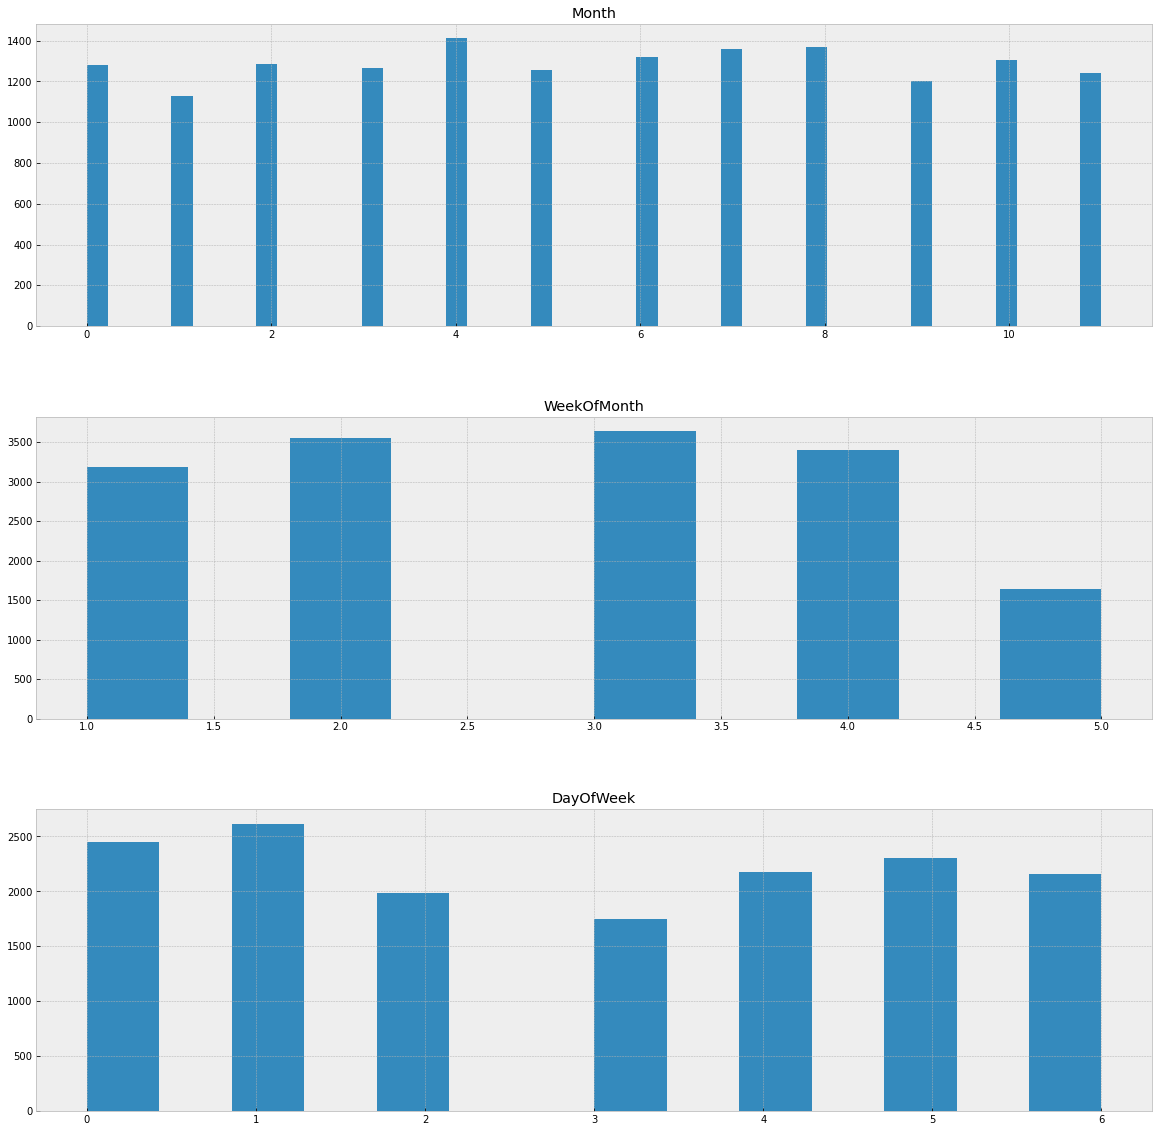

In [14]:
plt.rcParams["figure.figsize"]=(20,20)
fig,ax=plt.subplots(3)
df1.hist(["Month"],ax=ax[0],bins=48)
df1.hist(["WeekOfMonth"],ax=ax[1])
df1.hist(['DayOfWeek'],ax=ax[2],bins=14)


/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Make', ylabel='count'>

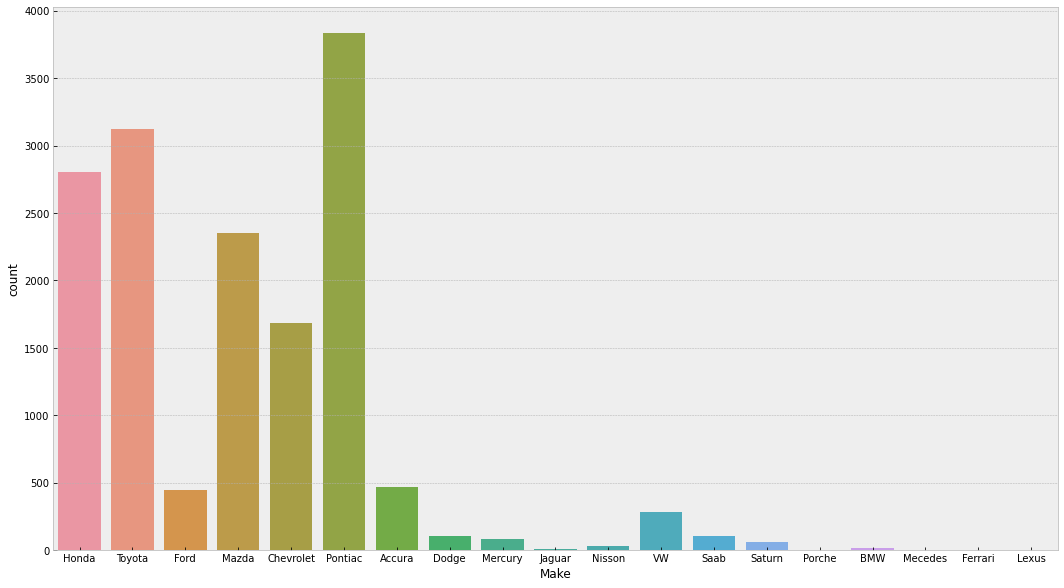

In [15]:
plt.rcParams["figure.figsize"]=(18,10)
sns.countplot(df1["Make"])

In [16]:
plt.style.use('seaborn-dark')

([<matplotlib.patches.Wedge at 0x7fa7a3262580>,
 [Text(-1.1369628517980064, 0.38381697934216613, 'Urban'),
  Text(1.136962815862462, -0.3838170857923098, 'Rural')],
 [Text(-0.6632283302155036, 0.22389323794959687, '90%'),
  Text(0.6632283092531028, -0.223893300045514, '10%')])

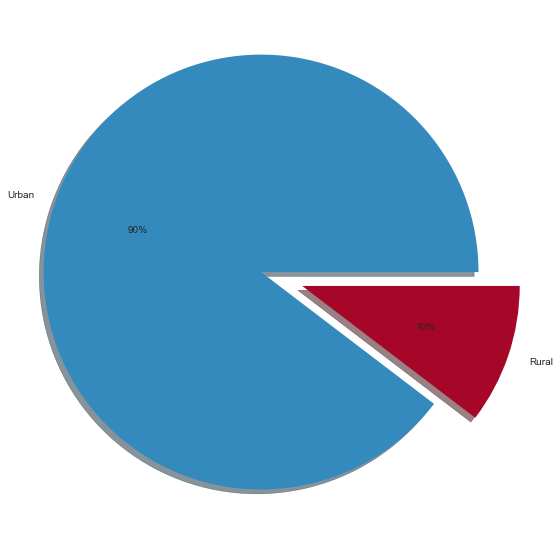

In [17]:
#df1["AccidentArea"].value_counts().plot(kind="pie")
Acc_area_pie=df1["AccidentArea"].value_counts()
explode=(0.1,0.1)
plt.pie(Acc_area_pie,shadow=True,explode=explode,autopct='%1.0f%%',labels=["Urban","Rural"])

In [18]:
plt.style.use("tableau-colorblind10")

array([<AxesSubplot:title={'center':'DayOfWeekClaimed'}>], dtype=object)

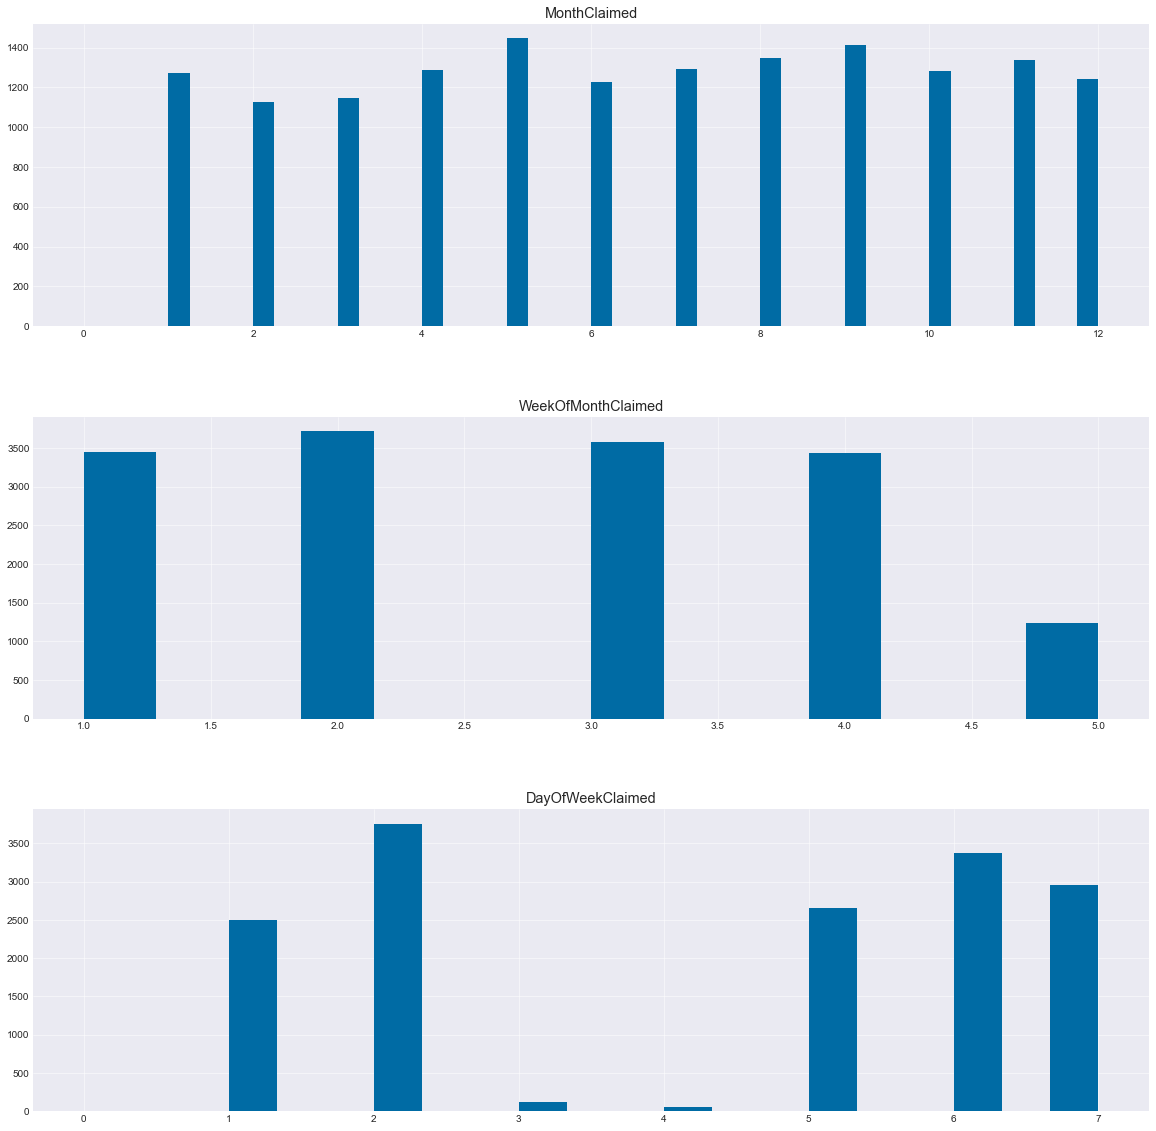

In [19]:
plt.rcParams["figure.figsize"]=(20,20)
fig,ax=plt.subplots(3)
df1.hist(["MonthClaimed"],ax=ax[0],bins=48)
df1.hist(["WeekOfMonthClaimed"],ax=ax[1],bins=14)
df1.hist(['DayOfWeekClaimed'],ax=ax[2],bins=21)

In [20]:
df1["MaritalStatus"].value_counts()

Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

In [21]:
df1["Sex"].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

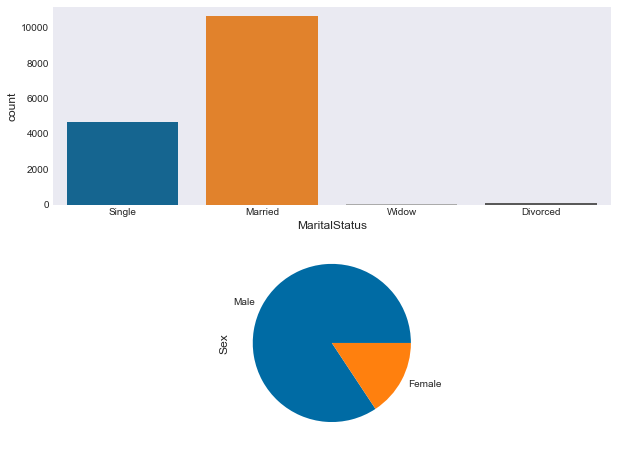

In [22]:
plt.rcParams["figure.figsize"]=(10,8)
fig,ax=plt.subplots(2)
df1.Sex.value_counts().plot(kind="pie")
sns.countplot(df1["MaritalStatus"],ax=ax[0])

<AxesSubplot:xlabel='Sex', ylabel='MaritalStatus'>

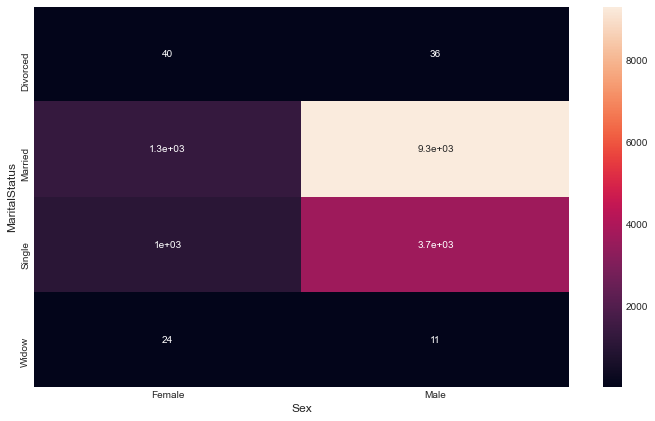

In [23]:
fig=plt.figure(figsize=(12,7))
sex_Marital=pd.crosstab(df1["MaritalStatus"],df1["Sex"])
sns.heatmap(sex_Marital,annot=True)

In [24]:
sex_Marital

Sex,Female,Male
MaritalStatus,,
Divorced,40,36
Married,1325,9300
Single,1031,3653
Widow,24,11


In [25]:
plt.style.use('dark_background')

<AxesSubplot:xlabel='Age', ylabel='MaritalStatus'>

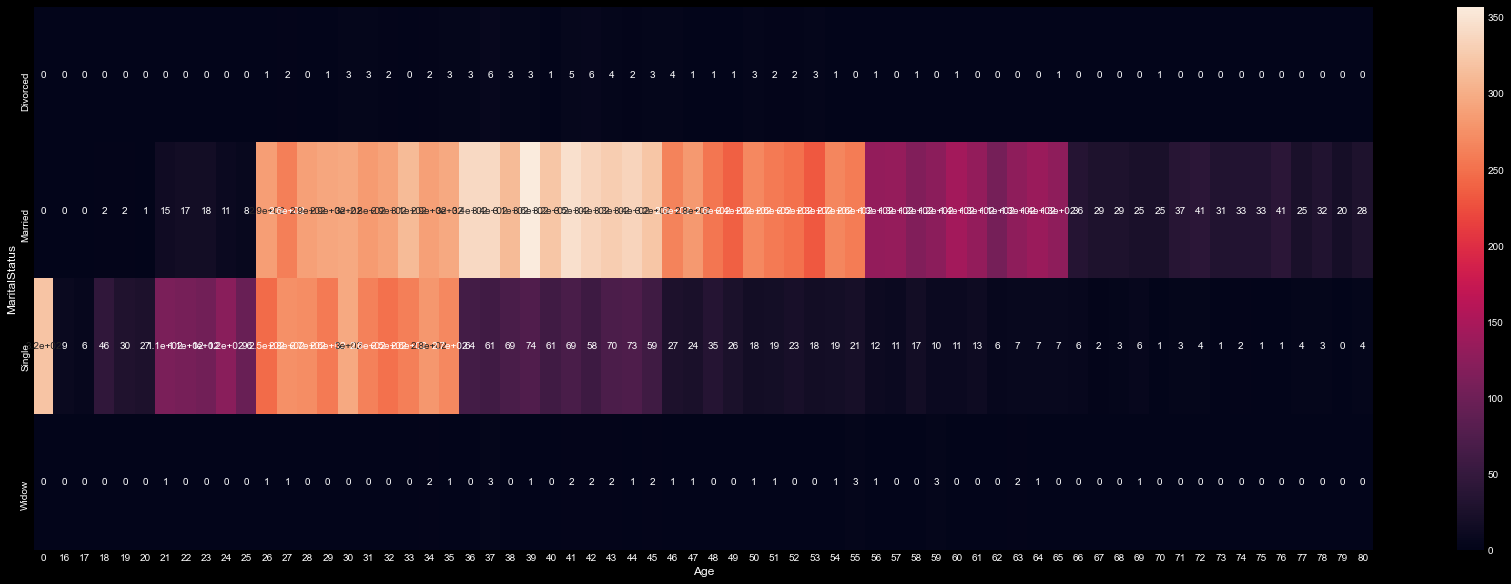

In [26]:
fig=plt.figure(figsize=(30,10))
Age_Marital=pd.crosstab(df1["MaritalStatus"],df1["Age"])
sns.heatmap(Age_Marital,annot=True)

In [27]:
df1["Age"].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66])

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='count'>

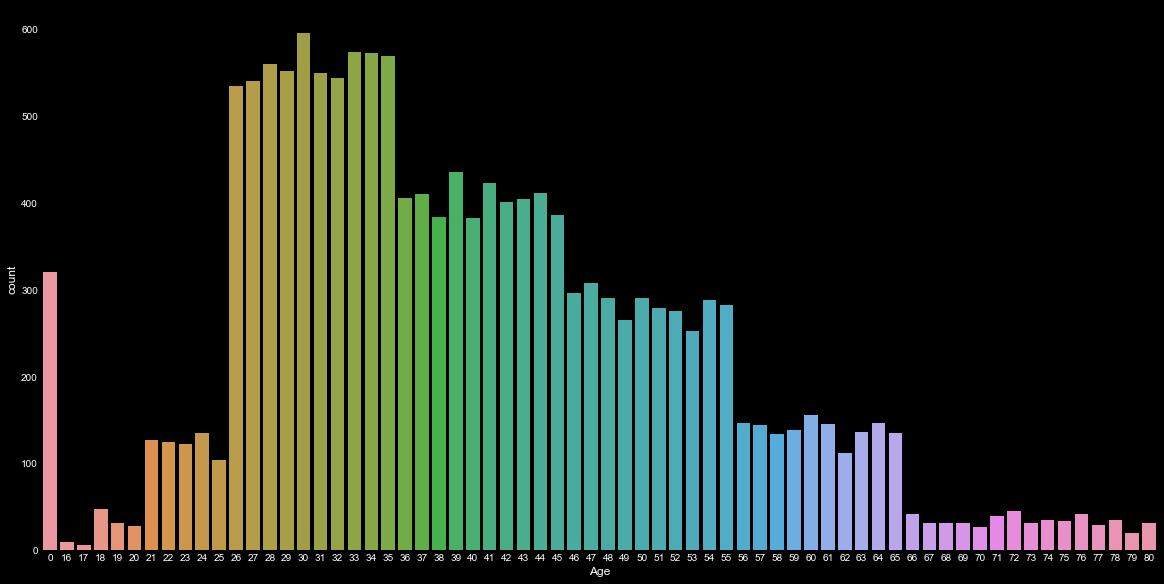

In [28]:
fig=plt.figure(figsize=(20,10))
sns.countplot(df1["Age"])

In [29]:
df1["Age"].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

In [30]:
pd.crosstab(df1["Sex"],df1["Fault"])

Fault,Policy Holder,Third Party
Sex,,
Female,1763,657
Male,9467,3533


<AxesSubplot:xlabel='Fault', ylabel='Sex'>

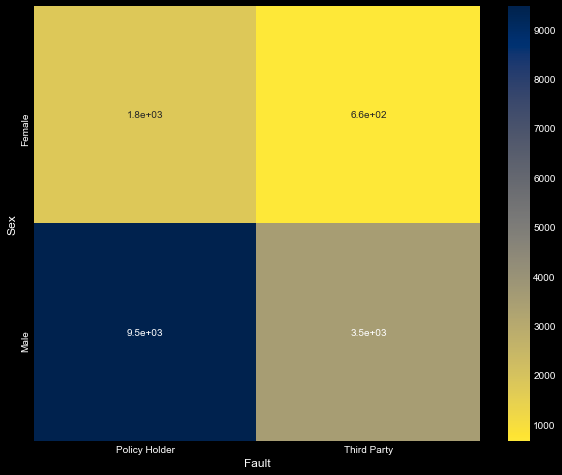

In [31]:
sns.heatmap(pd.crosstab(df1["Sex"],df1["Fault"]),annot=True,cmap=plt.cm.cividis_r)

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [33]:
plt.style.use("seaborn")

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Fault', ylabel='count'>

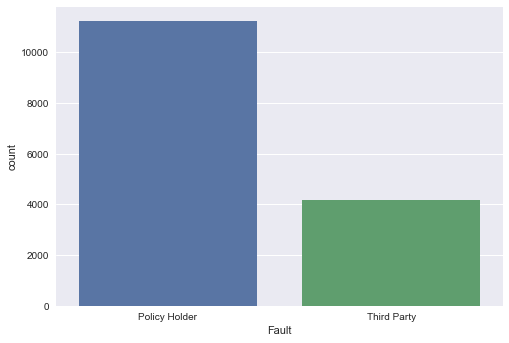

In [34]:
sns.countplot(df1["Fault"])

In [35]:
df1["PolicyType"].value_counts()

Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64

In [36]:
py.offline.init_notebook_mode(connected=True)
cff.go_offline()

In [37]:
df1["VehicleCategory"].iplot(kind="hist",color="black",xTitle="vehiclecategory",yTitle="count")


In [38]:
df1["VehiclePrice"].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [39]:
df1["Deductible"].value_counts()

400    14838
700      311
500      263
300        8
Name: Deductible, dtype: int64

In [40]:
df1["Deductible"].iplot(kind="line",bins=20)

In [41]:
plt.style.use("dark_background")

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Driver Rating')

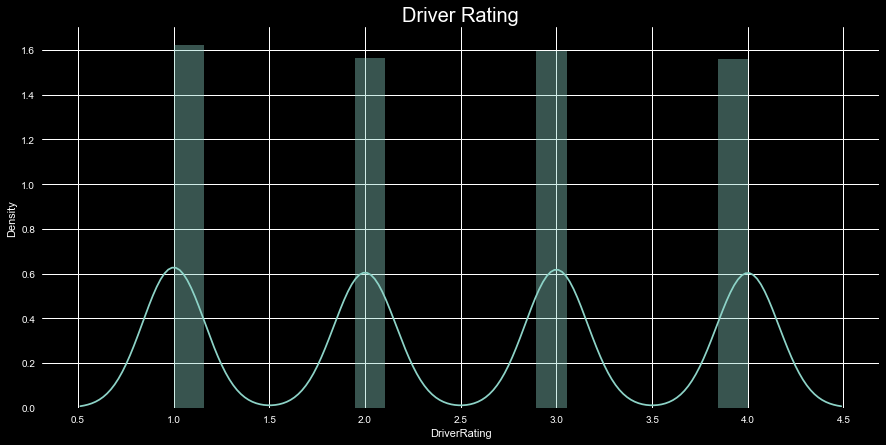

In [42]:
plt.rcParams["figure.figsize"]=(15,7)
sns.distplot(df1["DriverRating"])
plt.title("Driver Rating",size=20)

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PastNumberOfClaims', ylabel='count'>

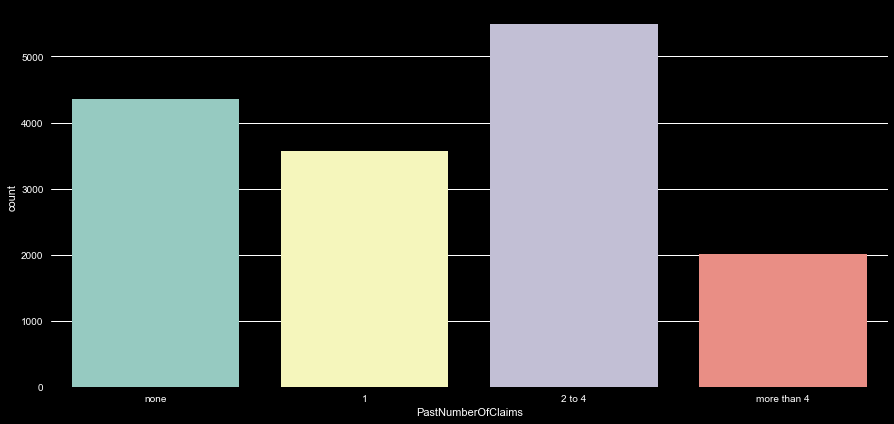

In [43]:
sns.countplot(df1["PastNumberOfClaims"])

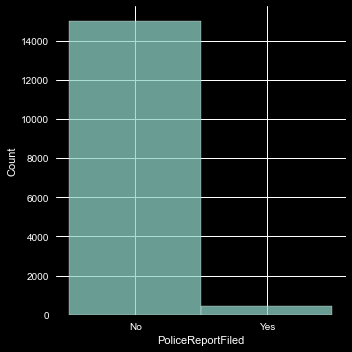

In [44]:
sns.displot(df1["PoliceReportFiled"])

In [45]:
a=pd.crosstab(df1["Sex"],df1["PoliceReportFiled"])
a

PoliceReportFiled,No,Yes
Sex,,
Female,2346,74
Male,12646,354


<AxesSubplot:xlabel='PoliceReportFiled', ylabel='Sex'>

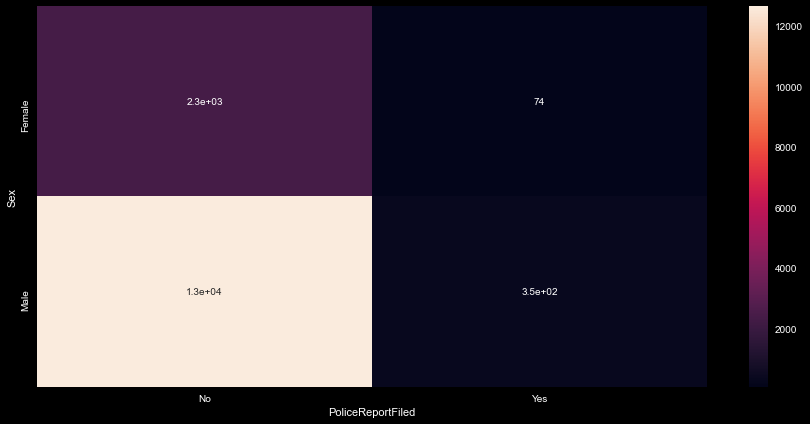

In [46]:
sns.heatmap(a,annot=True)

In [47]:
df1["AgentType"].value_counts()

External    15179
Internal      241
Name: AgentType, dtype: int64

<AxesSubplot:xlabel='NumberOfCars', ylabel='Count'>

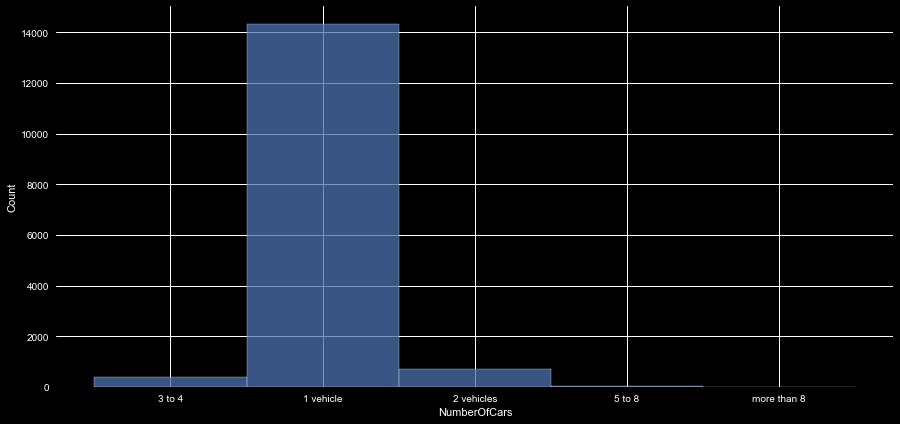

In [48]:
sns.histplot(df1["NumberOfCars"])

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



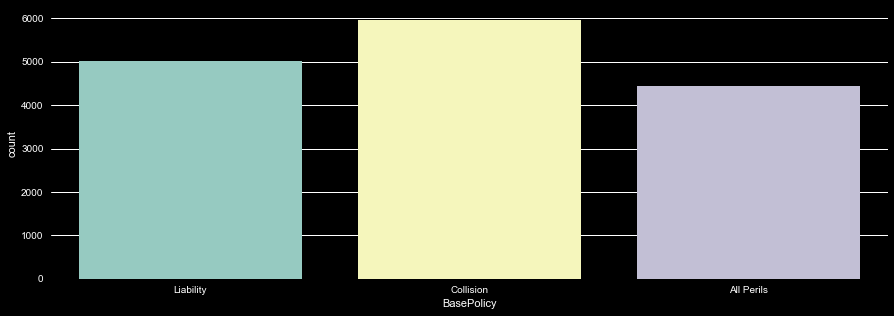

In [49]:
plt.rcParams["figure.figsize"]=(15,5)
sns.countplot(df1["BasePolicy"])
plt.show()

In [50]:
df1_0=df.copy()
df1_0=df1_0.apply(label_encoder.fit_transform)

In [51]:
df1_0.corr()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010631,-0.009539,0.000546,-0.000044,-0.025755,0.724350,0.042027,0.002912,-0.003970,0.004297,0.005238,0.007259,0.003668,-0.027333,-0.008670,0.028416,0.010936,-0.001274,0.003034,-0.000513,-0.012190,0.001351,-0.029197,0.010779,0.009988,-0.002106,0.015759,-0.010887,-0.007519,0.001343,0.028736,0.020496
WeekOfMonth,0.010631,1.000000,-0.011631,-0.001635,0.009116,0.015153,0.010057,0.275400,0.005314,0.019612,-0.007380,0.025456,-0.011729,-0.008125,-0.009173,-0.011861,-0.007797,0.005283,-0.004672,-0.016817,-0.008920,-0.012753,-0.007636,-0.014946,-0.002758,0.013026,0.013713,0.006477,-0.002903,0.008328,0.002521,-0.003906,-0.007765
DayOfWeek,-0.009539,-0.011631,1.000000,0.003368,0.006561,0.097745,-0.011879,-0.013871,-0.021240,-0.006635,0.012931,0.009289,0.008201,0.016761,-0.004343,-0.017456,0.003371,-0.008096,0.011349,-0.002828,-0.003170,-0.003034,-0.006323,0.003909,0.013371,-0.011897,0.000139,0.011524,-0.010927,-0.005163,0.002006,0.002614,0.014889
Make,0.000546,-0.001635,0.003368,1.000000,0.004274,-0.005093,0.010118,-0.007832,-0.026381,-0.010647,0.027052,0.000741,-0.161299,-0.117638,-0.126554,-0.019187,0.014620,0.000569,0.018977,0.005900,0.009772,0.003519,0.001616,-0.052966,0.052117,-0.008074,-0.000487,-0.014907,-0.025212,-0.003402,-0.000212,0.010880,-0.019868
AccidentArea,-0.000044,0.009116,0.006561,0.004274,1.000000,-0.011037,-0.002248,0.006584,-0.033804,0.003040,0.003996,0.008713,0.020992,0.043950,-0.017562,-0.033499,0.004220,0.006766,0.005443,-0.003323,0.003172,-0.002836,-0.016943,-0.012642,0.007964,0.001754,-0.028362,-0.005189,0.005056,0.003706,-0.007805,0.002284,0.043798
DayOfWeekClaimed,-0.025755,0.015153,0.097745,-0.005093,-0.011037,1.000000,-0.015568,0.013794,-0.000255,-0.018227,0.009753,0.004059,0.008645,0.000364,0.003189,-0.002065,-0.000914,-0.004856,0.005658,-0.007296,-0.007954,-0.021779,0.000931,-0.006638,0.008848,-0.018367,-0.001387,-0.015376,0.019374,0.011229,-0.010416,0.003641,-0.014311
MonthClaimed,0.724350,0.010057,-0.011879,0.010118,-0.002248,-0.015568,1.000000,0.032591,-0.002214,-0.007955,0.010371,0.004100,0.009081,0.005303,-0.032437,-0.010247,0.018584,0.014561,0.005894,0.006726,-0.009283,-0.006241,0.002608,-0.021683,0.019002,0.014008,-0.008587,0.016161,0.001370,-0.013402,-0.001779,0.021079,0.028323
WeekOfMonthClaimed,0.042027,0.275400,-0.013871,-0.007832,0.006584,0.013794,0.032591,1.000000,0.003739,0.000283,0.001604,-0.006337,0.000733,0.009179,-0.004257,-0.005761,0.011665,0.008908,0.005579,-0.000048,-0.002726,0.003108,-0.004542,0.003832,0.001397,0.023510,0.009369,-0.011314,-0.007100,-0.008343,0.008246,0.012175,0.013785
Sex,0.002912,0.005314,-0.021240,-0.026381,-0.033804,-0.000255,-0.002214,0.003739,1.000000,-0.114391,0.088110,0.000230,0.016128,-0.008733,0.056395,0.029953,0.004835,-0.000833,0.013671,-0.002788,-0.006370,0.013135,0.001373,0.209108,0.065444,-0.007413,-0.005585,0.012681,0.001952,0.004435,0.000081,0.000413,-0.069761
MaritalStatus,-0.003970,0.019612,-0.006635,-0.010647,0.003040,-0.018227,-0.007955,0.000283,-0.114391,1.000000,-0.425270,-0.007097,0.015443,0.016287,0.029626,0.000568,-0.013338,-0.005808,-0.037222,-0.013652,0.004469,0.006548,0.002008,-0.304202,-0.454045,0.011763,0.013862,0.007579,0.016742,-0.009533,-0.008308,-0.013994,0.047999


<AxesSubplot:>

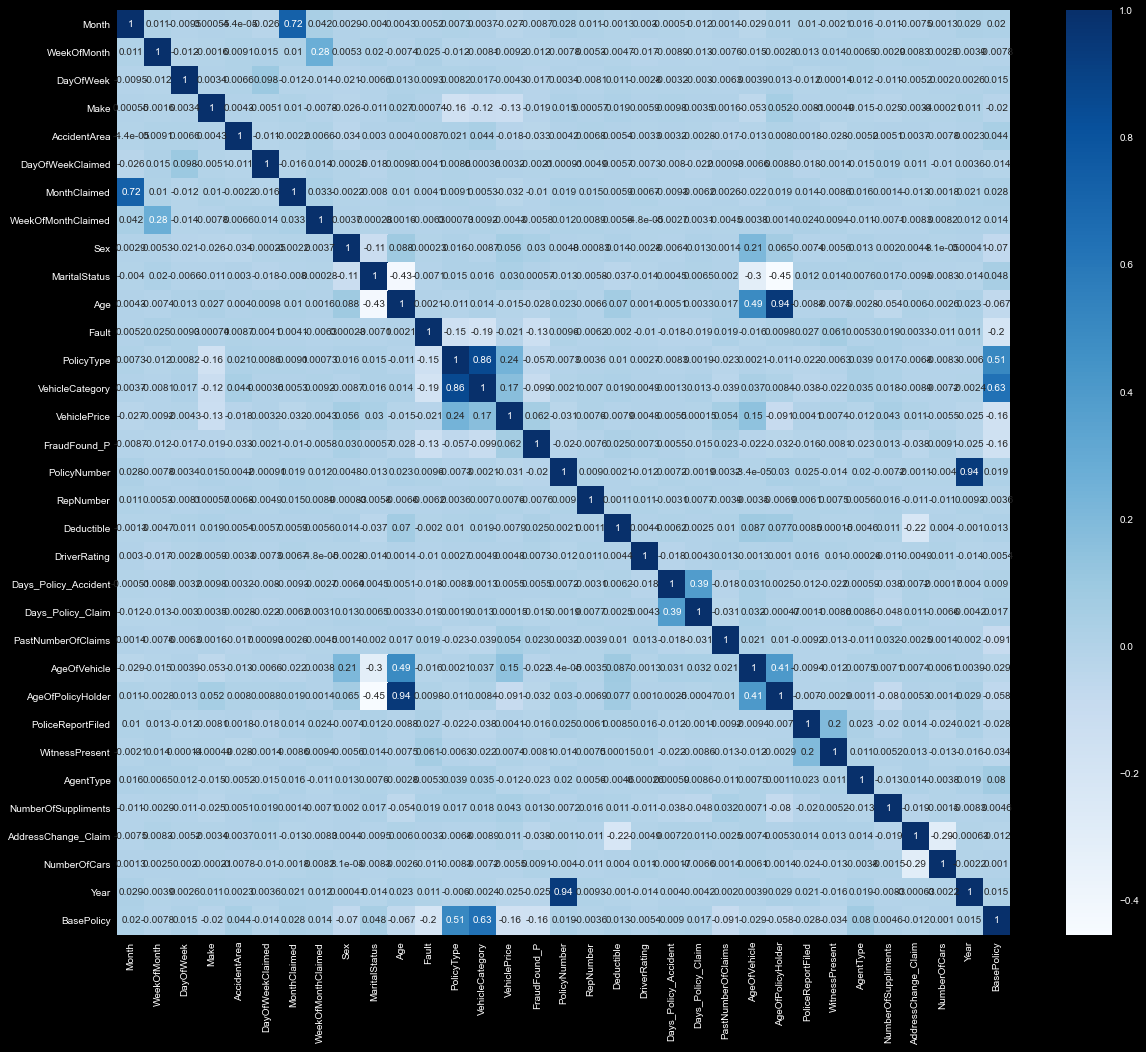

In [52]:
plt.rcParams["figure.figsize"]=(20,17)
sns.heatmap(df1_0.corr(),annot=True,cmap=plt.cm.Blues)

# Featur Engineering / Preprocessing 

In [53]:
df2=df.copy()

In [54]:
df2.shape

(15420, 33)

In [55]:
df2.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [56]:
df2.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [57]:
df2.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [58]:
df2=df2.drop(["WeekOfMonth","WeekOfMonthClaimed","FraudFound_P","PolicyNumber","RepNumber","DriverRating","Days_Policy_Accident","Days_Policy_Claim","AgeOfPolicyHolder","WitnessPresent","NumberOfSuppliments","AddressChange_Claim","Year"],axis=1)

In [59]:
df2.shape

(15420, 20)

In [60]:
df2.Month.unique(),df2.DayOfWeek.unique(),df2.Make.unique(),df2.AccidentArea.unique(),df2.DayOfWeekClaimed.unique(),df2.MonthClaimed.unique(),df2.Sex.unique(),df2.MaritalStatus.unique(),df2.Fault.unique(),df2.PolicyType.unique()

(array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
        'Jul', 'May', 'Sep'], dtype=object),
 array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
        'Thursday'], dtype=object),
 array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
        'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
        'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
       dtype=object),
 array(['Urban', 'Rural'], dtype=object),
 array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
        'Sunday', '0'], dtype=object),
 array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
        'Jun', 'Sep', 'Oct', '0'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object),
 array(['Policy Holder', 'Third Party'], dtype=object),
 array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
        'Utility - All Perils', 

In [61]:
df2.Age.unique(),df2.VehicleCategory.unique(),df2.VehiclePrice.unique(),df2.Deductible.unique(),df2.PastNumberOfClaims.unique(),df2.AgeOfVehicle.unique(),df2.PoliceReportFiled.unique(),df2.AgentType.unique(),df2.NumberOfCars.unique(),df2.BasePolicy.unique()

(array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
        40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
        64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
        67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66]),
 array(['Sport', 'Utility', 'Sedan'], dtype=object),
 array(['more than 69000', '20000 to 29000', '30000 to 39000',
        'less than 20000', '40000 to 59000', '60000 to 69000'],
       dtype=object),
 array([300, 400, 500, 700]),
 array(['none', '1', '2 to 4', 'more than 4'], dtype=object),
 array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
        '4 years', '2 years'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['External', 'Internal'], dtype=object),
 array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
       dtype=object),
 array(['Liability', 'Collision', 'All Perils'], dtype=object))

In [62]:
df2["MonthClaimed"].value_counts()

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64

In [63]:
df2.DayOfWeekClaimed.value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [64]:
df2[df2["MonthClaimed"]=="0"]

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
1516,Jul,Monday,Honda,Rural,0,0,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,400,none,new,No,External,1 vehicle,All Perils


In [65]:
df2.loc[df2["DayOfWeekClaimed"].isin(["0"])]

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
1516,Jul,Monday,Honda,Rural,0,0,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,400,none,new,No,External,1 vehicle,All Perils


In [66]:
df2=df2.drop(index=1516,axis=0)

In [67]:
df2.shape

(15419, 20)

In [68]:
label_encoder=LabelEncoder()

In [69]:
df2.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Deductible', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'AgentType', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [70]:
df2["Month"]=label_encoder.fit_transform(df2["Month"])
df2["DayOfWeek"]=label_encoder.fit_transform(df2["DayOfWeek"])
df2["Make"]=label_encoder.fit_transform(df2["Make"])
df2["AccidentArea"]=label_encoder.fit_transform(df2["AccidentArea"])
df2["DayOfWeekClaimed"]=label_encoder.fit_transform(df2["DayOfWeekClaimed"])
df2["MonthClaimed"]=label_encoder.fit_transform(df2["MonthClaimed"])
df2["Sex"]=label_encoder.fit_transform(df2["Sex"])
df2["MaritalStatus"]=label_encoder.fit_transform(df2["MaritalStatus"])
df2["Fault"]=label_encoder.fit_transform(df2["Fault"])
df2["PolicyType"]=label_encoder.fit_transform(df2["PolicyType"])
df2["VehicleCategory"]=label_encoder.fit_transform(df2["VehicleCategory"])
df2["VehiclePrice"]=label_encoder.fit_transform(df2["VehiclePrice"])
df2["Deductible"]=label_encoder.fit_transform(df2["Deductible"])
df2["PastNumberOfClaims"]=label_encoder.fit_transform(df2["PastNumberOfClaims"])
df2["AgeOfVehicle"]=label_encoder.fit_transform(df2["AgeOfVehicle"])
df2["PoliceReportFiled"]=label_encoder.fit_transform(df2["PoliceReportFiled"])
df2["AgentType"]=label_encoder.fit_transform(df2["AgentType"])
df2["NumberOfCars"]=label_encoder.fit_transform(df2["NumberOfCars"])
df2["BasePolicy"]=label_encoder.fit_transform(df2["BasePolicy"])

In [71]:
df2.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
0,2,6,6,1,5,4,0,2,21,0,5,1,5,0,3,1,0,0,2,2
1,4,6,6,1,1,4,1,2,34,0,4,1,5,1,3,4,1,0,0,1
2,10,0,6,1,4,9,1,1,47,0,4,1,5,1,0,5,0,0,0,1
3,6,2,17,0,0,5,1,1,65,1,2,1,0,1,0,6,1,0,0,2
4,4,1,6,1,5,3,0,2,27,1,4,1,5,1,3,3,0,0,0,1


In [72]:
print(df2.dtypes)

Month                 int64
DayOfWeek             int64
Make                  int64
AccidentArea          int64
DayOfWeekClaimed      int64
MonthClaimed          int64
Sex                   int64
MaritalStatus         int64
Age                   int64
Fault                 int64
PolicyType            int64
VehicleCategory       int64
VehiclePrice          int64
Deductible            int64
PastNumberOfClaims    int64
AgeOfVehicle          int64
PoliceReportFiled     int64
AgentType             int64
NumberOfCars          int64
BasePolicy            int64
dtype: object


In [73]:
x=df2

In [74]:
x

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
0,2,6,6,1,5,4,0,2,21,0,5,1,5,0,3,1,0,0,2,2
1,4,6,6,1,1,4,1,2,34,0,4,1,5,1,3,4,1,0,0,1
2,10,0,6,1,4,9,1,1,47,0,4,1,5,1,0,5,0,0,0,1
3,6,2,17,0,0,5,1,1,65,1,2,1,0,1,0,6,1,0,0,2
4,4,1,6,1,5,3,0,2,27,1,4,1,5,1,3,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,0,17,1,5,9,1,1,35,0,1,0,0,1,1,4,0,0,0,1
15416,9,4,13,1,0,2,1,1,30,0,2,1,1,1,2,4,0,0,2,2
15417,9,4,17,0,0,2,1,2,24,0,1,0,0,1,2,3,0,0,0,1
15418,2,1,17,1,4,2,0,1,34,1,0,0,0,1,3,0,0,0,0,0


In [75]:
y=df1["FraudFound_P"]

In [76]:
y[y.index.isin([1516])]

1516    0
Name: FraudFound_P, dtype: int64

In [77]:
y=y.drop(index=1516,axis=0)

In [78]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15419, dtype: int64

In [79]:
y.value_counts() # -> Imbalanced Data

0    14496
1      923
Name: FraudFound_P, dtype: int64

# Balancing the Data

In [80]:
# Using smooting technique,
over_sampling=SMOTE()

In [81]:
_x,_y=over_sampling.fit_resample(x,y)

In [82]:
_y.value_counts() # -> Balanced Data

0    14496
1    14496
Name: FraudFound_P, dtype: int64

# Splitting Data

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(_x,_y,test_size=.55,random_state=1)

In [84]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((13046, 20), (15946, 20), (13046,), (15946,))

In [182]:
preds6

array([1, 0, 1, ..., 1, 0, 1])

In [184]:
_x[_x.index.isin([7768])]

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
7768,7,1,17,1,1,7,1,1,33,0,0,0,4,1,3,4,0,0,0,0


In [181]:
xtest

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
7768,7,1,17,1,1,7,1,1,33,0,0,0,4,1,3,4,0,0,0,0
2721,2,0,9,1,1,2,1,1,61,0,1,0,0,1,1,6,0,0,0,1
16438,3,1,9,0,6,7,1,2,32,0,1,0,0,1,2,3,0,0,1,1
7629,10,3,6,1,1,10,0,2,28,0,1,0,0,1,1,3,0,0,0,1
24753,6,1,7,1,0,1,1,1,60,0,1,0,0,1,0,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,11,1,2,1,6,11,1,1,60,0,0,0,0,1,0,6,0,0,0,0
9698,6,0,6,1,6,6,1,1,27,0,2,1,0,1,2,5,0,0,0,2
20111,10,5,6,0,5,10,0,1,63,0,0,0,0,1,1,6,0,0,0,0
9754,3,4,9,1,4,3,1,1,33,0,1,0,0,1,3,2,0,0,0,1


In [185]:
from sklearn.metrics import classification_report

In [186]:
print(classification_report(preds6,ytest))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7486
           1       0.96      0.89      0.93      8460

    accuracy                           0.93     15946
   macro avg       0.93      0.93      0.93     15946
weighted avg       0.93      0.93      0.93     15946



# Model 1

In [85]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [86]:
model1.score(xtrain,ytrain)

0.8210945883795799

In [87]:
model1.score(xtest,ytest)

0.8193904427442619

In [88]:
preds1=model1.predict(xtest)

In [89]:
preds1

array([1, 1, 1, ..., 1, 1, 1])

In [90]:
accuracy_score(preds1,ytest)

0.8193904427442619

In [91]:
mean_squared_error(preds1,ytest)

0.18060955725573813

In [92]:
mean_absolute_error(preds1,ytest)

0.18060955725573813

In [93]:
print("=========================================================================")
print("Logistic Regression Accuracy: ",accuracy_score(preds1,ytest))
print("=========================================================================")
print("Logistic Regression Error: ",mean_absolute_error(preds1,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds1,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds1,ytest))
print("=========================================================================")

Logistic Regression Accuracy:  0.8193904427442619
Logistic Regression Error:  0.18060955725573813
classification_report : 
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      6323
           1       0.93      0.76      0.84      9623

    accuracy                           0.82     15946
   macro avg       0.82      0.84      0.82     15946
weighted avg       0.84      0.82      0.82     15946

confution matrix : 
[[5761  562]
 [2318 7305]]


<AxesSubplot:>

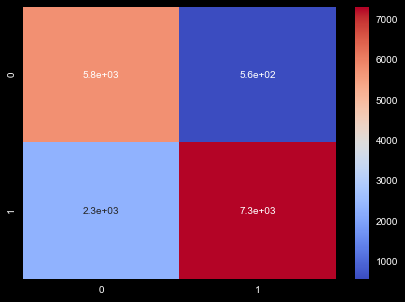

In [94]:
plt.rcParams["figure.figsize"]=(7,5)
c1=confusion_matrix(preds1,ytest)
sns.heatmap(c1,annot=True,cmap=plt.cm.coolwarm)

# Model 2

In [95]:
model2=BernoulliNB()

In [96]:
model2.fit(xtrain,ytrain)

BernoulliNB()

In [97]:
model2.score(xtrain,ytrain)

0.7585466809750115

In [98]:
model2.score(xtest,ytest)

0.7604414900288473

In [99]:
preds2=model2.predict(xtest)
preds2

array([1, 0, 0, ..., 1, 0, 0])

In [100]:
print("=========================================================================")
print("Bernoulli Navie Bayes Accuracy: ",accuracy_score(preds2,ytest))
print("=========================================================================")
print("Bernoulli Navie Bayes Error: ",mean_absolute_error(preds2,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds2,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds2,ytest))
print("=========================================================================")

Bernoulli Navie Bayes Accuracy:  0.7604414900288473
Bernoulli Navie Bayes Error:  0.23955850997115263
classification_report : 
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      9177
           1       0.69      0.80      0.74      6769

    accuracy                           0.76     15946
   macro avg       0.76      0.77      0.76     15946
weighted avg       0.77      0.76      0.76     15946

confution matrix : 
[[6718 2459]
 [1361 5408]]


<AxesSubplot:>

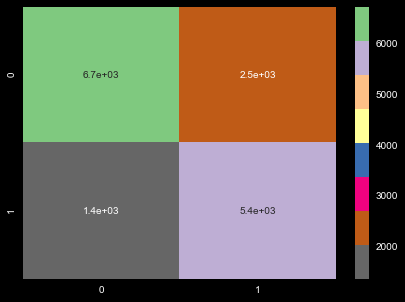

In [101]:
plt.rcParams["figure.figsize"]=(7,5)
c2=confusion_matrix(preds2,ytest)
sns.heatmap(c2,annot=True,cmap=plt.cm.Accent_r)

# Model 3

In [102]:
model3=DecisionTreeClassifier(criterion="entropy")
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [103]:
preds3=model3.predict(xtest)

In [104]:
preds3

array([0, 0, 1, ..., 1, 0, 1])

In [105]:
var_imp=model3.feature_importances_
var_imp

array([0.04818325, 0.05658828, 0.06595725, 0.01963663, 0.06106043,
       0.06161542, 0.01151917, 0.01947358, 0.11613045, 0.15945394,
       0.0127436 , 0.00301306, 0.03566955, 0.01564703, 0.03897072,
       0.04746733, 0.00470212, 0.00023629, 0.01003484, 0.21189703])

In [106]:
np.argmax(var_imp)

19

In [107]:
from sklearn import tree

[Text(0.8752911573120512, 0.984375, 'X[19] <= 1.5\nentropy = 1.0\nsamples = 13046\nvalue = [6417, 6629]'),
 Text(0.7705756129598559, 0.953125, 'X[9] <= 0.5\nentropy = 0.965\nsamples = 10796\nvalue = [4209, 6587]'),
 Text(0.5885096532625019, 0.921875, 'X[19] <= 0.5\nentropy = 0.873\nsamples = 9272\nvalue = [2722, 6550]'),
 Text(0.3177170776380822, 0.890625, 'X[15] <= 5.5\nentropy = 0.715\nsamples = 5441\nvalue = [1069, 4372]'),
 Text(0.21233226205601474, 0.859375, 'X[7] <= 1.5\nentropy = 0.622\nsamples = 4284\nvalue = [664, 3620]'),
 Text(0.11044111436110801, 0.828125, 'X[3] <= 0.5\nentropy = 0.539\nsamples = 3592\nvalue = [443, 3149]'),
 Text(0.027588517815257455, 0.796875, 'X[4] <= 5.5\nentropy = 0.251\nsamples = 953\nvalue = [40, 913]'),
 Text(0.021557019993298336, 0.765625, 'X[1] <= 5.5\nentropy = 0.208\nsamples = 888\nvalue = [29, 859]'),
 Text(0.019323131911091255, 0.734375, 'X[13] <= 1.5\nentropy = 0.181\nsamples = 840\nvalue = [23, 817]'),
 Text(0.017536021445325588, 0.703125, '

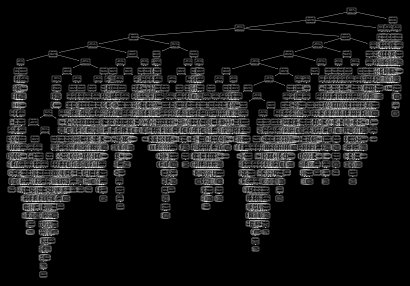

In [108]:
tree.plot_tree(model3)

In [109]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [110]:
plt.style.use("seaborn-dark")

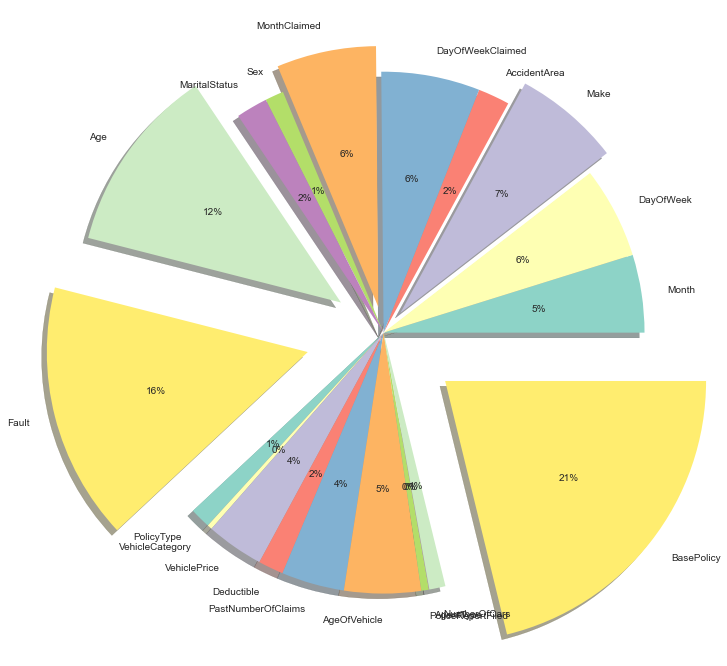

In [111]:
plt.figure(figsize=(12,12))
explode = (0.0, 0.0, 0.1, 0.0, 0.0, 0.1,0.0, 0.0, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0, 0.0, 0.3)
plt.pie(var_imp,labels=x.columns, autopct='%1.0f%%',shadow=True,explode=explode)
plt.show()

In [112]:
print("=========================================================================")
print("Decision Tree Accuracy: ",accuracy_score(preds3,ytest))
print("=========================================================================")
print("Decision Tree Error: ",mean_absolute_error(preds3,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds3,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds3,ytest))
print("=========================================================================")

Decision Tree Accuracy:  0.8954596764078766
Decision Tree Error:  0.10454032359212341
classification_report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7578
           1       0.93      0.87      0.90      8368

    accuracy                           0.90     15946
   macro avg       0.90      0.90      0.90     15946
weighted avg       0.90      0.90      0.90     15946

confution matrix : 
[[6995  583]
 [1084 7284]]


In [113]:
plt.style.use("bmh")

In [114]:
acc_train=[]
acc_test=[]
a=range(1,20)
def train_test_acc(a):
    for i in a:
        model3=DecisionTreeClassifier(criterion="entropy",max_depth=i)
        model3.fit(xtrain,ytrain)
        acc_train.append(model3.score(xtrain,ytrain))
        acc_test.append(model3.score(xtest,ytest))

In [115]:
train_test_acc(a)

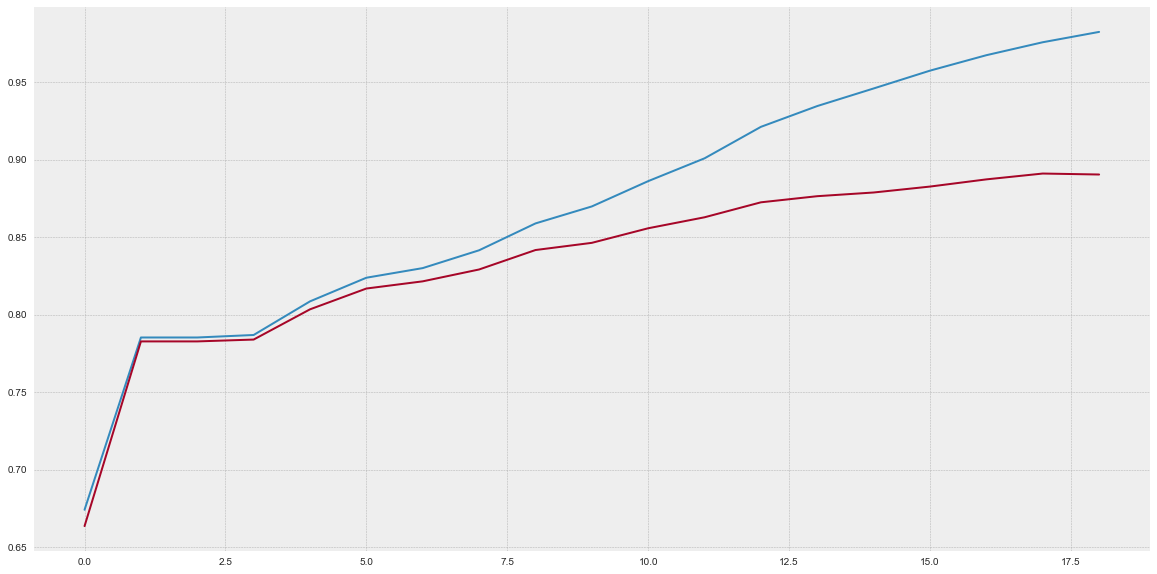

In [116]:
plt.figure(figsize=(20,10))
plt.plot(acc_train)
plt.plot(acc_test)

<AxesSubplot:>

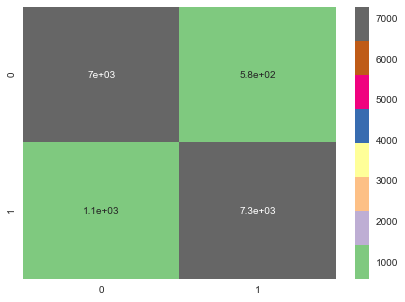

In [117]:
plt.rcParams["figure.figsize"]=(7,5)
c3=confusion_matrix(preds3,ytest)
sns.heatmap(c3,annot=True,cmap=plt.cm.Accent)

# Model 4

In [118]:
model4=BaggingClassifier()
model4.fit(xtrain,ytrain)

BaggingClassifier()

In [119]:
preds4=model4.predict(xtest)

In [120]:
accuracy_score(preds4,ytest)

0.9155901166436724

In [121]:
model4.score(xtrain,ytrain)

0.9963973631764526

In [122]:
model4.score(xtest,ytest)

0.9155901166436724

In [123]:
preds4

array([1, 0, 1, ..., 1, 0, 1])

In [124]:
print("=========================================================================")
print("Bagging Classifier Accuracy: ",accuracy_score(preds4,ytest))
print("=========================================================================")
print("Bagging Classifier Error: ",mean_absolute_error(preds4,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds4,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds4,ytest))
print("=========================================================================")

Bagging Classifier Accuracy:  0.9155901166436724
Bagging Classifier Error:  0.08440988335632761
classification_report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7665
           1       0.94      0.89      0.92      8281

    accuracy                           0.92     15946
   macro avg       0.92      0.92      0.92     15946
weighted avg       0.92      0.92      0.92     15946

confution matrix : 
[[7199  466]
 [ 880 7401]]


<AxesSubplot:>

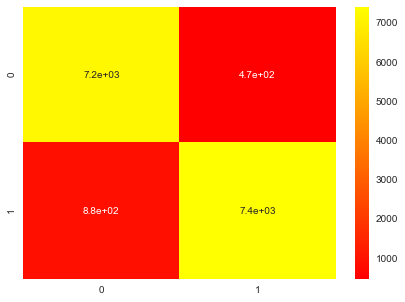

In [125]:
plt.rcParams["figure.figsize"]=(7,5)
c4=confusion_matrix(preds4,ytest)
sns.heatmap(c4,annot=True,cmap=plt.cm.autumn)

# Model 5

In [126]:
model5=KNeighborsClassifier()
model5.fit(xtrain,ytrain)

KNeighborsClassifier()

In [127]:
model5.score(xtrain,ytrain)

0.895523532117124

In [128]:
model5.score(xtest,ytest)

0.8429073121786028

In [129]:
preds5=model5.predict(xtest)
preds5

array([1, 1, 1, ..., 1, 0, 1])

In [130]:
print("=========================================================================")
print("KNN Accuracy: ",accuracy_score(preds5,ytest))
print("=========================================================================")
print("KNN Error: ",mean_absolute_error(preds5,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds5,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds5,ytest))
print("=========================================================================")

KNN Accuracy:  0.8429073121786028
KNN Error:  0.1570926878213972
classification_report : 
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      5662
           1       0.99      0.76      0.86     10284

    accuracy                           0.84     15946
   macro avg       0.84      0.88      0.84     15946
weighted avg       0.89      0.84      0.85     15946

confution matrix : 
[[5618   44]
 [2461 7823]]


<AxesSubplot:>

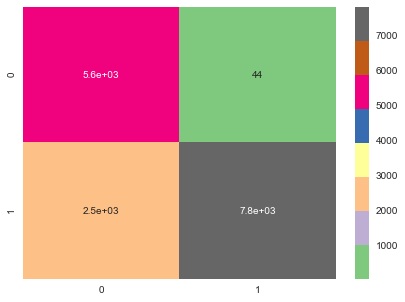

In [131]:
plt.rcParams["figure.figsize"]=(7,5)
c5=confusion_matrix(preds5,ytest)
sns.heatmap(c5,annot=True,cmap=plt.cm.Accent)

# Model 6

In [132]:
model6=RandomForestClassifier()
model6.fit(xtrain,ytrain)

RandomForestClassifier()

In [133]:
model6.score(xtrain,ytrain)

0.9997700444580715

In [134]:
model6.score(xtest,ytest)

0.9253104226765333

In [135]:
preds6=model6.predict(xtest)

In [136]:
preds6

array([1, 0, 1, ..., 1, 0, 1])

In [137]:
print("=========================================================================")
print("RF Accuracy: ",accuracy_score(preds6,ytest))
print("=========================================================================")
print("RF Error: ",mean_absolute_error(preds6,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds6,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds6,ytest))
print("=========================================================================")

RF Accuracy:  0.9253104226765333
RF Error:  0.0746895773234667
classification_report : 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7486
           1       0.96      0.89      0.93      8460

    accuracy                           0.93     15946
   macro avg       0.93      0.93      0.93     15946
weighted avg       0.93      0.93      0.93     15946

confution matrix : 
[[7187  299]
 [ 892 7568]]


<AxesSubplot:>

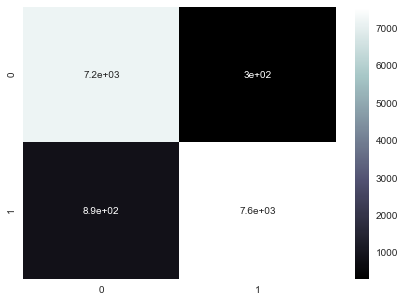

In [138]:
plt.rcParams["figure.figsize"]=(7,5)
c6=confusion_matrix(preds6,ytest)
sns.heatmap(c6,annot=True,cmap=plt.cm.bone)

In [139]:
xtest


,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfCars,BasePolicy
7768,7,1,17,1,1,7,1,1,33,0,0,0,4,1,3,4,0,0,0,0
2721,2,0,9,1,1,2,1,1,61,0,1,0,0,1,1,6,0,0,0,1
16438,3,1,9,0,6,7,1,2,32,0,1,0,0,1,2,3,0,0,1,1
7629,10,3,6,1,1,10,0,2,28,0,1,0,0,1,1,3,0,0,0,1
24753,6,1,7,1,0,1,1,1,60,0,1,0,0,1,0,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,11,1,2,1,6,11,1,1,60,0,0,0,0,1,0,6,0,0,0,0
9698,6,0,6,1,6,6,1,1,27,0,2,1,0,1,2,5,0,0,0,2
20111,10,5,6,0,5,10,0,1,63,0,0,0,0,1,1,6,0,0,0,0
9754,3,4,9,1,4,3,1,1,33,0,1,0,0,1,3,2,0,0,0,1


In [140]:
df[df.index.isin(())]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


# Model 7

In [141]:
model7=MultinomialNB()
model7.fit(xtrain,ytrain)

MultinomialNB()

In [142]:
model7.score(xtrain,ytrain)

0.756707036639583

In [143]:
model7.score(xtest,ytest)

0.757243195785777

In [144]:
preds7=model7.predict(xtest)
preds7

array([1, 1, 0, ..., 1, 0, 1])

In [145]:
print("=========================================================================")
print("Multinomial Navie Bayes Accuracy: ",accuracy_score(preds7,ytest))
print("=========================================================================")
print("Multinomial Navie Bayes Error: ",mean_absolute_error(preds7,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds7,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds7,ytest))
print("=========================================================================")

Multinomial Navie Bayes Accuracy:  0.757243195785777
Multinomial Navie Bayes Error:  0.242756804214223
classification_report : 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      7926
           1       0.76      0.75      0.76      8020

    accuracy                           0.76     15946
   macro avg       0.76      0.76      0.76     15946
weighted avg       0.76      0.76      0.76     15946

confution matrix : 
[[6067 1859]
 [2012 6008]]


<AxesSubplot:>

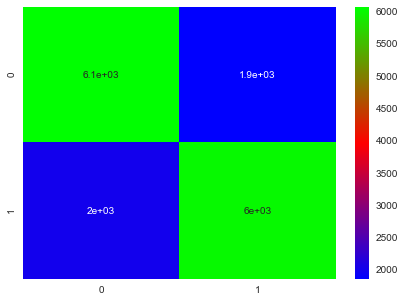

In [146]:
plt.rcParams["figure.figsize"]=(7,5)
c7=confusion_matrix(preds7,ytest)
sns.heatmap(c7,annot=True,cmap=plt.cm.brg)

# Model 8

In [147]:
model8=SVC()

In [148]:
model8.fit(xtrain,ytrain)

SVC()

In [149]:
model8.score(xtrain,ytrain)

0.8092902038939138

In [150]:
model8.score(xtest,ytest)

0.8065972657719804

In [151]:
preds8=model8.predict(xtest)
preds8

array([1, 1, 1, ..., 1, 1, 1])

In [152]:
print("=========================================================================")
print("SVC Accuracy: ",accuracy_score(preds8,ytest))
print("=========================================================================")
print("SVC Error: ",mean_absolute_error(preds8,ytest))
print("=========================================================================")
print("classification_report : ")
print(classification_report(preds8,ytest))
print("=========================================================================")
print("confution matrix : ")
print(confusion_matrix(preds8,ytest))
print("=========================================================================")

SVC Accuracy:  0.8065972657719804
SVC Error:  0.19340273422801957
classification_report : 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      6569
           1       0.90      0.76      0.82      9377

    accuracy                           0.81     15946
   macro avg       0.81      0.82      0.81     15946
weighted avg       0.82      0.81      0.81     15946

confution matrix : 
[[5782  787]
 [2297 7080]]


<AxesSubplot:>

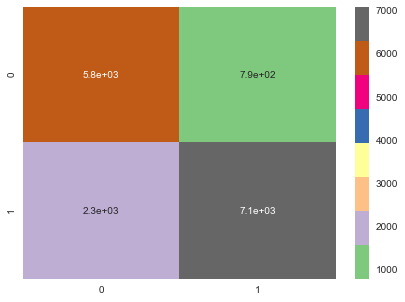

In [153]:
plt.rcParams["figure.figsize"]=(7,5)
c8=confusion_matrix(preds8,ytest)
sns.heatmap(c8,annot=True,cmap=plt.cm.Accent)

In [154]:
accuracy_dict=dict()
accuracy_dict["LR"]=accuracy_score(preds1,ytest)
accuracy_dict["Bernoulli NB"]=accuracy_score(preds2,ytest)
accuracy_dict["Decision Tree"]=accuracy_score(preds3,ytest)
accuracy_dict["Bagging Classifier"]=accuracy_score(preds4,ytest)
accuracy_dict["KNN"]=accuracy_score(preds5,ytest)
accuracy_dict["RF"]=accuracy_score(preds6,ytest)
accuracy_dict["Multinomial NB"]=accuracy_score(preds7,ytest)
accuracy_dict["SVC"]=accuracy_score(preds8,ytest)

In [155]:
accuracy_dict

{'LR': 0.8193904427442619,
 'Bernoulli NB': 0.7604414900288473,
 'Decision Tree': 0.8954596764078766,
 'Bagging Classifier': 0.9155901166436724,
 'KNN': 0.8429073121786028,
 'RF': 0.9253104226765333,
 'Multinomial NB': 0.757243195785777,
 'SVC': 0.8065972657719804}

<AxesSubplot:>

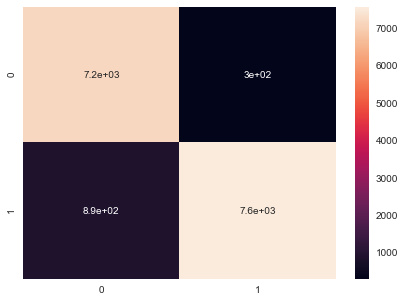

In [179]:
sns.heatmap(confusion_matrix(preds6,ytest),annot=True)

In [180]:
confusion_matrix(preds6,ytest)

array([[7187,  299],
       [ 892, 7568]])

In [176]:
from sklearn.metrics import classification_report

In [177]:
print(classification_report(preds6,ytest))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7486
           1       0.96      0.89      0.93      8460

    accuracy                           0.93     15946
   macro avg       0.93      0.93      0.93     15946
weighted avg       0.93      0.93      0.93     15946



In [156]:
accuracy_table=pd.DataFrame(list(accuracy_dict.items()),columns=["Model","Accuracy"])

In [157]:
accuracy_table

,Model,Accuracy
0,LR,0.819390
1,Bernoulli NB,0.760441
2,Decision Tree,0.895460
3,Bagging Classifier,0.915590
4,KNN,0.842907
5,RF,0.925310
6,Multinomial NB,0.757243
7,SVC,0.806597


In [158]:
accuracy_table_sort=accuracy_table.sort_values("Accuracy",ascending=False)

In [159]:
accuracy_table_sort

,Model,Accuracy
5,RF,0.925310
3,Bagging Classifier,0.915590
2,Decision Tree,0.895460
4,KNN,0.842907
0,LR,0.819390
7,SVC,0.806597
1,Bernoulli NB,0.760441
6,Multinomial NB,0.757243


In [160]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

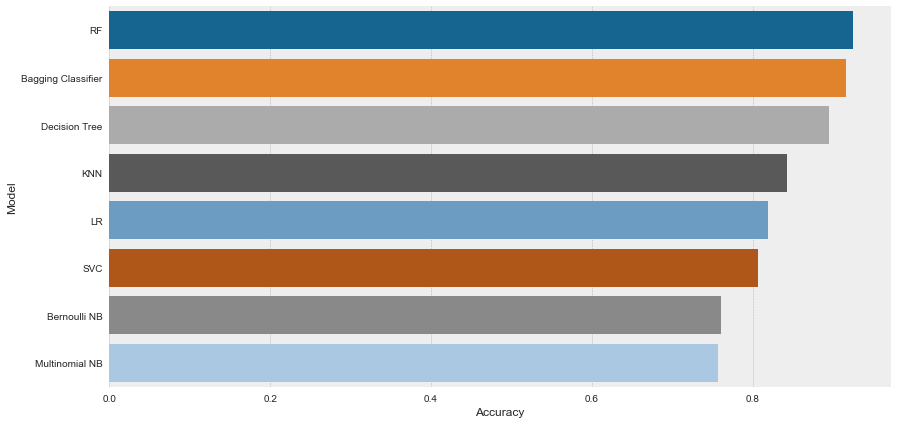

In [161]:
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(14,7))
sns.barplot(y=accuracy_table_sort.Model,x=accuracy_table_sort.Accuracy)

# Cheaking

In [162]:
a=[2,6,6,1,5,4,0,2,21,0,5,1,5,0,3,1,0,0,2,2]

In [163]:
b=np.asarray(a)
b

array([ 2,  6,  6,  1,  5,  4,  0,  2, 21,  0,  5,  1,  5,  0,  3,  1,  0,
        0,  2,  2])

In [164]:
c=b.reshape(1,-1)
c

array([[ 2,  6,  6,  1,  5,  4,  0,  2, 21,  0,  5,  1,  5,  0,  3,  1,
         0,  0,  2,  2]])

In [165]:
model6.predict(c)

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [166]:
model6.predict_proba(c)

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([[0.85, 0.15]])

# Decided Model is Random Forest - Ensemble Models, Because Its gives a best accuracy, which is almost 94%.

# Creating Deployment Model File

In [167]:
import pickle
file_name='automobile_insurance_detect.pkl'
f = open(file_name,'wb')
pickle.dump(model6,f)
f.close()

In [168]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.0.0
aiocache                           0.11.1
aiofiles                           0.8.0
aiohttp                            3.6.2
aiopubsub                          2.1.5
aioredis                           2.0.1
aiosmtplib                         1.1.2
alabaster                          0.7.12
alembic                            1.3.3
altair                             4.2.0
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
aniso8601                          7.0.0
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
APScheduler                        3.6.3
argh                               0.26.2
argon2-cffi                        20.

spacy                              3.2.3
spacy-legacy                       3.0.9
spacy-loggers                      1.0.1
Sphinx                             4.0.1
sphinxcontrib-applehelp            1.0.2
sphinxcontrib-devhelp              1.0.2
sphinxcontrib-htmlhelp             1.0.3
sphinxcontrib-jsmath               1.0.1
sphinxcontrib-qthelp               1.0.3
sphinxcontrib-serializinghtml      1.1.4
sphinxcontrib-websupport           1.2.4
spyder                             4.2.5
spyder-kernels                     1.10.2
SQLAlchemy                         1.3.13
SQLAlchemy-Utils                   0.36.1
srsly                              2.4.2
statsmodels                        0.12.2
streamlit                          1.8.1
streamlit-option-menu              0.3.2
stripe                             2.42.0
sweetviz                           2.1.3
sympy                              1.8
tables                             3.6.1
tangled-up-in-unicode              0.1.0
tblib        